# 영화 리뷰 분류 - 이진분류예제

In [1]:
import keras
print(keras.__version__)

2.9.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

* 데이터 중에서 상위 10,000개 단어만 가지고 온다. (자주 사용되는거 10,000개)

In [3]:
train_data.shape

(25000,)

* 1차원 데이터로 되어있다.

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()  # <- 각각의 데이터는 뭐였어 하는 것이다.
word_index
reverse_word_index = dict([value, key] for (key, value) in word_index.items())  # items()는 딕셔너리 안에 있는 항목들을 가지고 온다.

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])   # ' '이것도 문자이기 때문에 문자 객체에 대해 사용할 수 있는게 나온다.
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

* 디코딩을 해본다.
* 0,1,2는 중요하지 않은 데이터라서, i-3을 해주고 시작한다.
* 없는 문자가 들어오면 ?로 하라는 것이다.

In [8]:
type(reverse_word_index)

dict

In [9]:
# 데이터를 준비  <- 이부분이 잘 이해가 안된다.
import numpy as np

def vectorize_sequences(sequences, dimension = 10000): # dimension의 값을 주지 않으면 default값으로 10000이 들어가게 된다.
  results = np.zeros((len(sequences), dimension)) # 0으로 가득찬 배열
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results 

# Data의 Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [11]:
# float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
# 신경망 구축
from keras import models
from keras import layers

model = models.Sequential()    # 관행상 nerwork나 model이라고 부른다.
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [18]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001), # 'rmsprop'말고 텐서플로우에서 가지고 와서 제약을 걸어준다.
              loss = 'binary_crossentropy',  # 이진 분류라서 loss를 binary_crossentropy를 사용하였다.
              metrics = ['accuracy'])

In [19]:
x_val = x_train[:10000]  # 25,000개 중에서 앞부분을 슬라이스해서 10,000개를 가지고 오는 것이다.
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5026 - accuracy: 0.7892 - val_loss: 0.4063 - val_accuracy: 0.8370
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2941 - accuracy: 0.9025 - val_loss: 0.2978 - val_accuracy: 0.8894
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2146 - accuracy: 0.9305 - val_loss: 0.2754 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1682 - accuracy: 0.9446 - val_loss: 0.2990 - val_accuracy: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1395 - accuracy: 0.9553 - val_loss: 0.2844 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1119 - accuracy: 0.9656 - val_loss: 0.3202 - val_accuracy: 0.8776
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0899 - accuracy: 0.9746 - val_loss: 0.3254 - val_accuracy: 0.8787
Epoch 8/20
30

* history객체로 리턴을 해준다.

In [21]:
# 실험 결과 데이터를 가져온다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)  # 반복횟수니깐 1부터 시작한다.

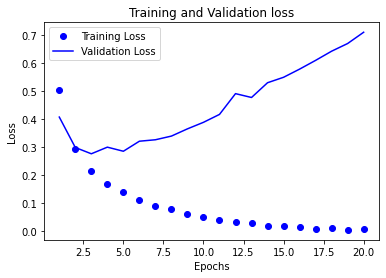

In [22]:
# 실험 결과를 시각화한다.
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

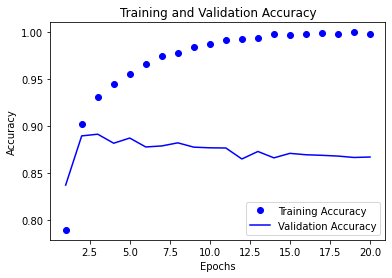

In [23]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 3,
                    batch_size = 256,  # 컴퓨터가 2의 배수단계로 이루어지기 때문에 2의 배수를 사용한 것이다.
                    validation_data = (x_val, y_val))

Epoch 1/3
59/59 [==============================] - 3s 30ms/step - loss: 0.4609 - accuracy: 0.8210 - val_loss: 0.3312 - val_accuracy: 0.8805
Epoch 2/3
59/59 [==============================] - 1s 25ms/step - loss: 0.2551 - accuracy: 0.9111 - val_loss: 0.2766 - val_accuracy: 0.8910
Epoch 3/3
59/59 [==============================] - 1s 23ms/step - loss: 0.1831 - accuracy: 0.9363 - val_loss: 0.3002 - val_accuracy: 0.8796


## enumerate에 대한 설명

In [24]:
for i, c in enumerate(['A', 'B', 'C'], start = 1):
  print(i, c)

1 A
2 B
3 C


* enumerate를 사용하면 각각의 자리에 인덱스가 붙게 된다.
* 그리고 i, c를 사용해서 인덱스와 문자를 나누어서 출력을 한다.

In [28]:
temp = enumerate(['A', 'B', 'C'])
# list(temp) # enumerate는 튜플타입으로 되어 있어서 다른 것으로 변환해서 사용하는 것도 가능하다.
next(temp)

(0, 'A')

# END